In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#creating dataframes of the tables in case its needed
Measurement_df = session.query(Measurement.id, Measurement.station, \
                               Measurement.date, Measurement.prcp, Measurement.tobs).all()
M_df = pd.DataFrame(Measurement_df)
Station_df = session.query(Station.id, Station.station, \
                           Station.name, Station.latitude, Station.longitude, Station.elevation).all()
S_df = pd.DataFrame(Station_df)

In [10]:
#merging the tables on station
M_S_df = pd.merge(M_df, S_df, on='station')
all_data = M_S_df[['id_x','station','name','date','prcp','tobs','latitude','longitude','elevation']]
final_df = all_data.rename(columns={"id_x": "id"})
final_df.set_index('id', inplace=True)
#final_df

In [11]:
# Find the most recent date in the data set.
date_find = session.query(Measurement.date).order_by(Measurement.id.desc()).first()
recent_date = 0
for x in date_find:
    recent_date = x
    print(f"the most recent date in the data set is {recent_date}")

the most recent date in the data set is 2017-08-23


<AxesSubplot:xlabel='date'>

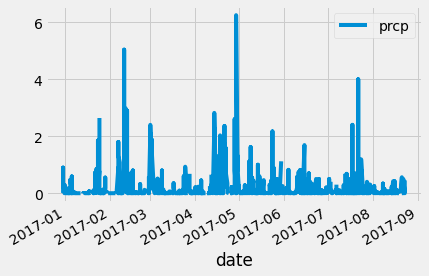

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
conn = engine.connect()

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

##querying the id,date,percipitation data from the measurement table,
##converting the date column to datetime, making it into dataframe
data = pd.read_sql("SELECT id,date,prcp FROM measurement", conn)
data['date'] = pd.to_datetime(data['date'])
data_info_df = pd.DataFrame(data)
##breaking up the date and adding year month and date columns
##calculating the date for 1 year ago and making it a variable to call
data_info_df['year'] = data_info_df['date'].dt.year
data_info_df['month'] = data_info_df['date'].dt.month
data_info_df['day'] = data_info_df['date'].dt.day
last_year = data_info_df['year'].max()
last_yr_yr = last_year - 1
last_yr_mon = data_info_df['month'].max()
last_yr_day = data_info_df['day'].max()
last_yr_date = (f"{last_yr_yr}-{last_yr_mon}-{last_yr_day}")
##finding all the info in the date range requested, and transforming the dataframe to match whats requested
date_range = data_info_df[(data_info_df['date'] >= last_yr_date) & (data_info_df['date'] <= recent_date)]
date_range_ndd = date_range[['date','prcp']]
final_date = date_range_ndd.set_index('date')
final_date.head(50)



# Use Pandas Plotting with Matplotlib to plot the data

final_date.plot()


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
final_date.describe()

,prcp
count,1272.000000
mean,0.166958
std,0.453724
min,0.000000
25%,0.000000
50%,0.000000
75%,0.110000
max,6.250000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()